# Dogs vs Cats

## Dataset

In [18]:
import pathlib
import os
import shutil

In [19]:
base_dir = pathlib.Path('dogs-vs-cats')
src_dir = pathlib.Path('dogs-vs-cats-original/train')

In [7]:
print(base_dir / 'test')

dogs-vs-cats/test


In [25]:
# the original dataset is at 'dogs-vs-cats-original'
# a new dataset folder is 'dogs-vs-cats' <-- this is for image_dataset_from_directory

# This function will create a folder identified by subset_name by copying images 
# from the 'train' directory at 'dogs-vs-cats-original'

# subset_name: train, validation, test
def make_dataset_for_image_dataset_from_directory(subset_name, start_index, end_index):
    for category in ("dog", "cat"):
        dir = base_dir / subset_name / category
        #print(dir)
        if os.path.exists(dir) is False:
            os.makedirs(dir)
        files = [f'{category}.{i}.jpg' for i in range(start_index, end_index)]
        #print(files)
        for file in files:
            shutil.copyfile(src=src_dir / file, dst=dir / file)
            print(f'src:{src_dir / file} => dst:{dir / file}')





In [26]:
make_dataset_for_image_dataset_from_directory('train', 0, 1000)


src:dogs-vs-cats-original/train/dog.0.jpg => dst:dogs-vs-cats/train/dog/dog.0.jpg
src:dogs-vs-cats-original/train/dog.1.jpg => dst:dogs-vs-cats/train/dog/dog.1.jpg
src:dogs-vs-cats-original/train/dog.2.jpg => dst:dogs-vs-cats/train/dog/dog.2.jpg
src:dogs-vs-cats-original/train/dog.3.jpg => dst:dogs-vs-cats/train/dog/dog.3.jpg
src:dogs-vs-cats-original/train/dog.4.jpg => dst:dogs-vs-cats/train/dog/dog.4.jpg
src:dogs-vs-cats-original/train/dog.5.jpg => dst:dogs-vs-cats/train/dog/dog.5.jpg
src:dogs-vs-cats-original/train/dog.6.jpg => dst:dogs-vs-cats/train/dog/dog.6.jpg
src:dogs-vs-cats-original/train/dog.7.jpg => dst:dogs-vs-cats/train/dog/dog.7.jpg
src:dogs-vs-cats-original/train/dog.8.jpg => dst:dogs-vs-cats/train/dog/dog.8.jpg
src:dogs-vs-cats-original/train/dog.9.jpg => dst:dogs-vs-cats/train/dog/dog.9.jpg
src:dogs-vs-cats-original/train/dog.10.jpg => dst:dogs-vs-cats/train/dog/dog.10.jpg
src:dogs-vs-cats-original/train/dog.11.jpg => dst:dogs-vs-cats/train/dog/dog.11.jpg
src:dogs-vs-

In [27]:
make_dataset_for_image_dataset_from_directory('validation', 1000, 1500)

src:dogs-vs-cats-original/train/dog.1000.jpg => dst:dogs-vs-cats/validation/dog/dog.1000.jpg
src:dogs-vs-cats-original/train/dog.1001.jpg => dst:dogs-vs-cats/validation/dog/dog.1001.jpg
src:dogs-vs-cats-original/train/dog.1002.jpg => dst:dogs-vs-cats/validation/dog/dog.1002.jpg
src:dogs-vs-cats-original/train/dog.1003.jpg => dst:dogs-vs-cats/validation/dog/dog.1003.jpg
src:dogs-vs-cats-original/train/dog.1004.jpg => dst:dogs-vs-cats/validation/dog/dog.1004.jpg
src:dogs-vs-cats-original/train/dog.1005.jpg => dst:dogs-vs-cats/validation/dog/dog.1005.jpg
src:dogs-vs-cats-original/train/dog.1006.jpg => dst:dogs-vs-cats/validation/dog/dog.1006.jpg
src:dogs-vs-cats-original/train/dog.1007.jpg => dst:dogs-vs-cats/validation/dog/dog.1007.jpg
src:dogs-vs-cats-original/train/dog.1008.jpg => dst:dogs-vs-cats/validation/dog/dog.1008.jpg
src:dogs-vs-cats-original/train/dog.1009.jpg => dst:dogs-vs-cats/validation/dog/dog.1009.jpg
src:dogs-vs-cats-original/train/dog.1010.jpg => dst:dogs-vs-cats/valid

In [28]:
make_dataset_for_image_dataset_from_directory('test', 1500, 2500)

src:dogs-vs-cats-original/train/dog.1500.jpg => dst:dogs-vs-cats/test/dog/dog.1500.jpg
src:dogs-vs-cats-original/train/dog.1501.jpg => dst:dogs-vs-cats/test/dog/dog.1501.jpg
src:dogs-vs-cats-original/train/dog.1502.jpg => dst:dogs-vs-cats/test/dog/dog.1502.jpg
src:dogs-vs-cats-original/train/dog.1503.jpg => dst:dogs-vs-cats/test/dog/dog.1503.jpg
src:dogs-vs-cats-original/train/dog.1504.jpg => dst:dogs-vs-cats/test/dog/dog.1504.jpg
src:dogs-vs-cats-original/train/dog.1505.jpg => dst:dogs-vs-cats/test/dog/dog.1505.jpg
src:dogs-vs-cats-original/train/dog.1506.jpg => dst:dogs-vs-cats/test/dog/dog.1506.jpg
src:dogs-vs-cats-original/train/dog.1507.jpg => dst:dogs-vs-cats/test/dog/dog.1507.jpg
src:dogs-vs-cats-original/train/dog.1508.jpg => dst:dogs-vs-cats/test/dog/dog.1508.jpg
src:dogs-vs-cats-original/train/dog.1509.jpg => dst:dogs-vs-cats/test/dog/dog.1509.jpg
src:dogs-vs-cats-original/train/dog.1510.jpg => dst:dogs-vs-cats/test/dog/dog.1510.jpg
src:dogs-vs-cats-original/train/dog.1511.jp

## We are ready for `image_dataset_from_directory`

In [29]:
import tensorflow as tf

2024-11-18 19:18:33.995861: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-18 19:18:34.004416: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-18 19:18:34.073450: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-18 19:18:34.152093: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-18 19:18:34.217215: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [30]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    base_dir / 'train',
    image_size=(180,180),
    batch_size=32
)

Found 2000 files belonging to 2 classes.


I0000 00:00:1731975661.697337   10872 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-18 19:21:01.697878: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [34]:
for data_batch, labels_batch in train_dataset:
    print(f'data batch shape: {data_batch.shape}')
    print(f'label batch shape: {labels_batch.shape}')
    print(f'labels: {labels_batch}')
    break

data batch shape: (32, 180, 180, 3)
label batch shape: (32,)
labels: [0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1]


In [35]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    base_dir / 'validation',
    image_size=(180,180),
    batch_size=32
)


Found 1000 files belonging to 2 classes.


In [36]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
    base_dir / 'test',
    image_size=(180,180),
    batch_size=32
)

Found 2000 files belonging to 2 classes.


## Design CNN Architecture

In [41]:
import tensorflow as tf
from tensorflow.keras import layers

In [42]:
inputs = layers.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.AveragePooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.AveragePooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.AveragePooling2D(pool_size=2)(x)

x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)



In [43]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [44]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [45]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 89, 89, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 43, 43, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 20, 20, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        25,601 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,185 (192.13 KB)

 Trainable params: 49,185 (192.13 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.keras'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [48]:
history = model.fit(train_dataset, epochs=20, 
                    validation_data=validation_dataset, 
                    callbacks=callbacks)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - accuracy: 0.5072 - loss: 0.7094 - val_accuracy: 0.5620 - val_loss: 0.6818
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - accuracy: 0.5779 - loss: 0.6761 - val_accuracy: 0.5920 - val_loss: 0.6793
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 147ms/step - accuracy: 0.6305 - loss: 0.6471 - val_accuracy: 0.6270 - val_loss: 0.6683
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - accuracy: 0.6653 - loss: 0.6174 - val_accuracy: 0.6210 - val_loss: 0.6437
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - accuracy: 0.6788 - loss: 0.5977 - val_accuracy: 0.6380 - val_loss: 0.6159
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 147ms/step - accuracy: 0.7004 - loss: 0.5719 - val_accuracy: 0.6760 - val_loss: 0.5979
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - accuracy: 0.7418 - loss: 0.5285 - val_accuracy: 0.6760 - val_loss: 0.5950
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - accuracy: 0.7455 - loss: 0.5218 - val_accuracy: 0

In [49]:
import matplotlib.pyplot as plt

In [50]:
acc = history.history['accuracy']
loss = history.history['loss']

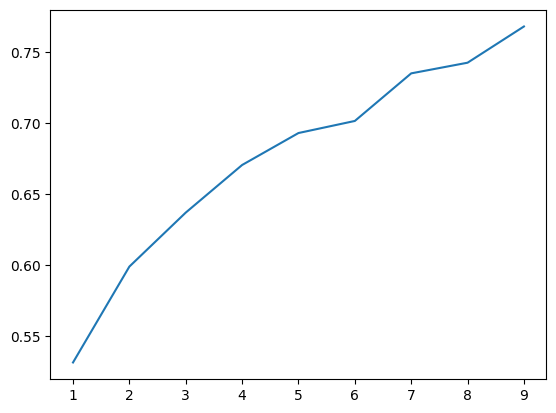

In [ ]:
plt.plot(range(1, len(acc)+1), acc, label='Traiing Acc')

In [53]:
for test_batch, labels_batch in test_dataset:
    predictions = model.predict(test_batch)
    break

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


In [54]:
predictions

array([[0.7054085 ],
       [0.159149  ],
       [0.5052124 ],
       [0.23638718],
       [0.8777362 ],
       [0.05473589],
       [0.44451216],
       [0.01595455],
       [0.23702046],
       [0.594128  ],
       [0.6742759 ],
       [0.12052899],
       [0.46567622],
       [0.9762608 ],
       [0.01735835],
       [0.70359135],
       [0.23325288],
       [0.6010729 ],
       [0.33249587],
       [0.14316894],
       [0.8310062 ],
       [0.00697708],
       [0.8447037 ],
       [0.19894731],
       [0.07290691],
       [0.22756903],
       [0.16533156],
       [0.24515186],
       [0.9723444 ],
       [0.5781151 ],
       [0.1054908 ],
       [0.39848435]], dtype=float32)

## Data Augmentation

In [57]:
from tensorflow.keras import layers

In [58]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2)
])

In [ ]:
inputs = layers.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.AveragePooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.AveragePooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.AveragePooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.AveragePooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.AveragePooling2D(pool_size=2)(x)

x = layers.Flatten()(x)
x = layers.Dense(200, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)


In [ ]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.keras'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [78]:
history = model.fit(train_dataset, epochs=20, 
                    validation_data=validation_dataset, 
                    callbacks=callbacks)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 165ms/step - accuracy: 0.6759 - loss: 0.6030 - val_accuracy: 0.6390 - val_loss: 0.6391
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - accuracy: 0.6823 - loss: 0.6012 - val_accuracy: 0.6570 - val_loss: 0.6072
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - accuracy: 0.6723 - loss: 0.6038 - val_accuracy: 0.6380 - val_loss: 0.6860
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 165ms/step - accuracy: 0.6805 - loss: 0.6001 - val_accuracy: 0.6480 - val_loss: 0.6638
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 171ms/step - accuracy: 0.6843 - loss: 0.6097 - val_accuracy: 0.6890 - val_loss: 0.5818
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step - accuracy: 0.6804 - loss: 0.5863 - val_accuracy: 0.6690 - val_loss: 0.5843
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 174ms/step - accuracy: 0.7072 - loss: 0.5853 - val_accuracy: 0.6580 - val_loss: 0.6355
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 171ms/step - accuracy: 0.7146 - loss: 0.5724 - val_accu

In [79]:
acc = history.history['accuracy']
loss = history.history['loss']

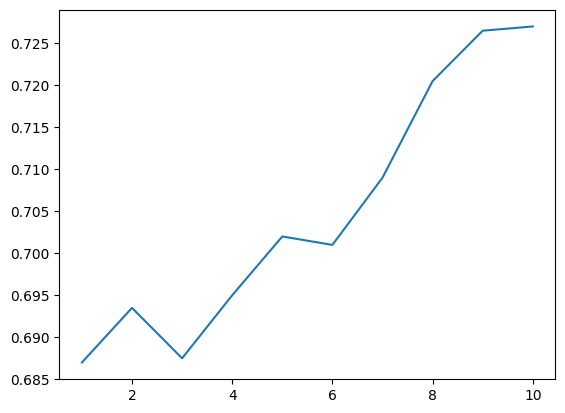

In [80]:
plt.plot(range(1, len(acc)+1), acc, label='Traiing Acc')